In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [188]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [189]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [190]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [191]:
df.reset_index(drop=True,inplace=True)

In [192]:
df.drop(all_indices,axis=0,inplace= True)

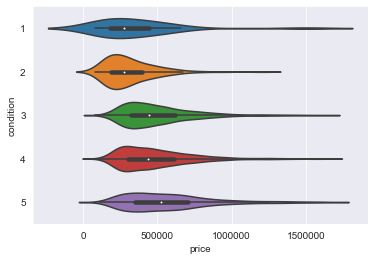

In [193]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

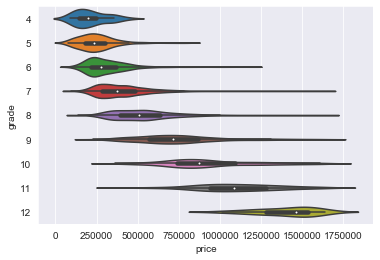

In [194]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [195]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

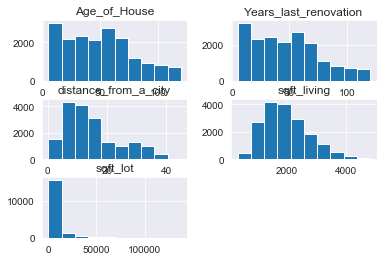

In [196]:
df[features].hist();

In [197]:
tobox = ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [198]:
for feat in tobox:
    df[feat] = np.log(df[feat])


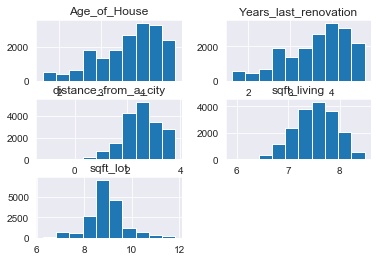

In [199]:
df[features].hist();

In [200]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [201]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

In [202]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [203]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [204]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [205]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [206]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [207]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9',
       'grade10', 'grade11']
outcome = ['price']

In [208]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'grade']
# outcome = ['price']

In [209]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [210]:
X = df[x_cols]
y = df['price']

In [211]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:35:13   Log-Likelihood:                     -2.4158e+05
No. Observations:               18208   AIC:                                  4.832e+05
Df Residuals:                   18194   BIC:                                  4.833e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.623e+04   1391.393    -11.664      0.000    -1.9e+04   -1.35e+04
bathrooms              1.895e+04   1796.503     10.550      0.000    1.54e+04    2.25e+04
sqft_living            9.822e+04   2128.420     46.148      0.000    9.41e+04    1.02e+05
sqft_lot               2.461e+04   1338.160     18.394      0.000     2.2e+04    2.72e+04
distance_from_a_city   -1.25e+05   1222.822   -102.257      0.000   -1.27e+05   -1.23e+05
Years_last_renovation  1.593e+04   1465.139     10.873      0.000    1.31e+04    1.88e+04
grade4                 4.929e+05   2.83e+04     17.404      0.000    4.37e+05    5.48e+05
grade5                 4.494e+05   1.04e+04     43.298      0.000    4.29e+05     4.7e+05
grade6                 4.263e+05   3990.887    106.826      0.000    4.19e+05    4.34e+05
grade7                  4.48e+05   1742.088    257.173      0.000    4.45e+05    4.51e+05
grade8                 5.062e+05   2047.344    247.231      0.000    5.02e+05     5.1e+05
grade9                  6.35e+05   3508.159    181.010      0.000    6.28e+05    6.42e+05
grade10                7.461e+05   5549.889    134.428      0.000    7.35e+05    7.57e+05
grade11                8.761e+05   1.05e+04     83.089      0.000    8.55e+05    8.97e+05
==============================================================================
Omnibus:                     6058.598   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47428.042
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                      10.406   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

14 14
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.623e+04,1391.393,-11.664,0.0,-1.9e+04,-1.35e+04
bathrooms,1.895e+04,1796.503,10.550,0.0,1.54e+04,2.25e+04
sqft_living,9.822e+04,2128.420,46.148,0.0,9.41e+04,1.02e+05
sqft_lot,2.461e+04,1338.160,18.394,0.0,2.2e+04,2.72e+04
distance_from_a_city,-1.25e+05,1222.822,-102.257,0.0,-1.27e+05,-1.23e+05


In [213]:
X = df[x_cols]
y= df['price']

In [214]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:35:14   Log-Likelihood:                     -2.4158e+05
No. Observations:               18208   AIC:                                  4.832e+05
Df Residuals:                   18194   BIC:                                  4.833e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.623e+04   1391.393    -11.664      0.000    -1.9e+04   -1.35e+04
bathrooms              1.895e+04   1796.503     10.550      0.000    1.54e+04    2.25e+04
sqft_living            9.822e+04   2128.420     46.148      0.000    9.41e+04    1.02e+05
sqft_lot               2.461e+04   1338.160     18.394      0.000     2.2e+04    2.72e+04
distance_from_a_city   -1.25e+05   1222.822   -102.257      0.000   -1.27e+05   -1.23e+05
Years_last_renovation  1.593e+04   1465.139     10.873      0.000    1.31e+04    1.88e+04
grade4                 4.929e+05   2.83e+04     17.404      0.000    4.37e+05    5.48e+05
grade5                 4.494e+05   1.04e+04     43.298      0.000    4.29e+05     4.7e+05
grade6                 4.263e+05   3990.887    106.826      0.000    4.19e+05    4.34e+05
grade7                  4.48e+05   1742.088    257.173      0.000    4.45e+05    4.51e+05
grade8                 5.062e+05   2047.344    247.231      0.000    5.02e+05     5.1e+05
grade9                  6.35e+05   3508.159    181.010      0.000    6.28e+05    6.42e+05
grade10                7.461e+05   5549.889    134.428      0.000    7.35e+05    7.57e+05
grade11                8.761e+05   1.05e+04     83.089      0.000    8.55e+05    8.97e+05
==============================================================================
Omnibus:                     6058.598   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47428.042
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                      10.406   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.799386481454663),
 ('bathrooms', 2.9997180532406507),
 ('sqft_living', 4.210556778675124),
 ('sqft_lot', 1.6643355524256342),
 ('distance_from_a_city', 1.3897970834508844),
 ('Years_last_renovation', 1.995180617579391),
 ('grade4', 1.02364858051948),
 ('grade5', 1.094301783836563),
 ('grade6', 1.4301812503892357),
 ('grade7', 1.2039360394176684),
 ('grade8', 1.125949156818075),
 ('grade9', 1.3608278684954034),
 ('grade10', 1.2783373254405699),
 ('grade11', 1.1009772056710339)]

In [216]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

14 14


In [217]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:35:15   Log-Likelihood:                     -2.4158e+05
No. Observations:               18208   AIC:                                  4.832e+05
Df Residuals:                   18194   BIC:                                  4.833e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.623e+04   1391.393    -11.664      0.000    -1.9e+04   -1.35e+04
bathrooms              1.895e+04   1796.503     10.550      0.000    1.54e+04    2.25e+04
sqft_living            9.822e+04   2128.420     46.148      0.000    9.41e+04    1.02e+05
sqft_lot               2.461e+04   1338.160     18.394      0.000     2.2e+04    2.72e+04
distance_from_a_city   -1.25e+05   1222.822   -102.257      0.000   -1.27e+05   -1.23e+05
Years_last_renovation  1.593e+04   1465.139     10.873      0.000    1.31e+04    1.88e+04
grade4                 4.929e+05   2.83e+04     17.404      0.000    4.37e+05    5.48e+05
grade5                 4.494e+05   1.04e+04     43.298      0.000    4.29e+05     4.7e+05
grade6                 4.263e+05   3990.887    106.826      0.000    4.19e+05    4.34e+05
grade7                  4.48e+05   1742.088    257.173      0.000    4.45e+05    4.51e+05
grade8                 5.062e+05   2047.344    247.231      0.000    5.02e+05     5.1e+05
grade9                  6.35e+05   3508.159    181.010      0.000    6.28e+05    6.42e+05
grade10                7.461e+05   5549.889    134.428      0.000    7.35e+05    7.57e+05
grade11                8.761e+05   1.05e+04     83.089      0.000    8.55e+05    8.97e+05
==============================================================================
Omnibus:                     6058.598   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47428.042
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                      10.406   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

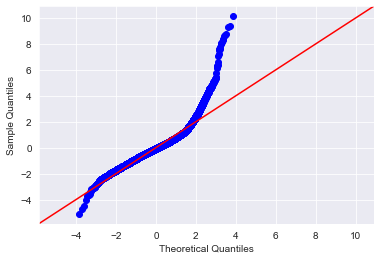

In [218]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


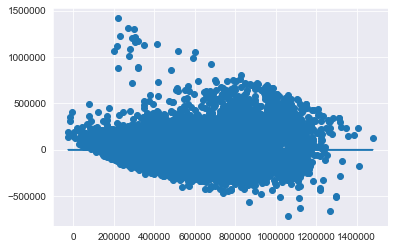

In [219]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

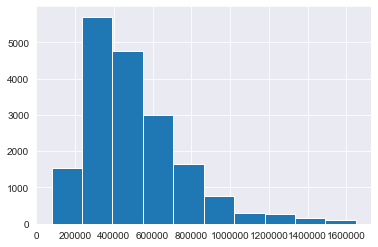

In [220]:
df.price.hist()

In [221]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [222]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.04822056239015817


In [223]:
X = df[x_cols]
y = df['price']

In [224]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     3006.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:35:16   Log-Likelihood:            -2.2535e+05
No. Observations:               17330   AIC:                         4.507e+05
Df Residuals:                   17316   BIC:                         4.508e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.245e+04   1104.236    -11.274      0.000   -1.46e+04   -1.03e+04
bathrooms              7155.2022   1431.527      4.998      0.000    4349.265    9961.139
sqft_living            8.247e+04   1681.152     49.056      0.000    7.92e+04    8.58e+04
sqft_lot               2.068e+04   1062.724     19.462      0.000    1.86e+04    2.28e+04
distance_from_a_city  -1.057e+05    988.348   -106.966      0.000   -1.08e+05   -1.04e+05
Years_last_renovation  9125.6092   1182.617      7.716      0.000    6807.561    1.14e+04
grade4                 4.408e+05   2.18e+04     20.261      0.000    3.98e+05    4.83e+05
grade5                 4.117e+05   7989.967     51.526      0.000    3.96e+05    4.27e+05
grade6                 3.998e+05   3098.585    129.017      0.000    3.94e+05    4.06e+05
grade7                 4.375e+05   1350.215    323.995      0.000    4.35e+05     4.4e+05
grade8                 4.993e+05   1595.934    312.847      0.000    4.96e+05    5.02e+05
grade9                 5.974e+05   2856.103    209.156      0.000    5.92e+05    6.03e+05
grade10                6.642e+05   4918.011    135.056      0.000    6.55e+05    6.74e+05
grade11                7.274e+05   1.31e+04     55.437      0.000    7.02e+05    7.53e+05
==============================================================================
Omnibus:                      560.671   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.919
Skew:                           0.317   Prob(JB):                    3.08e-187
Kurtosis:                       3.888   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

14 14
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.245e+04,1104.236,-11.274,0.0,-1.46e+04,-1.03e+04
bathrooms,7155.2022,1431.527,4.998,0.0,4349.265,9961.139
sqft_living,8.247e+04,1681.152,49.056,0.0,7.92e+04,8.58e+04
sqft_lot,2.068e+04,1062.724,19.462,0.0,1.86e+04,2.28e+04
distance_from_a_city,-1.057e+05,988.348,-106.966,0.0,-1.08e+05,-1.04e+05


In [226]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     3006.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:35:17   Log-Likelihood:            -2.2535e+05
No. Observations:               17330   AIC:                         4.507e+05
Df Residuals:                   17316   BIC:                         4.508e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.245e+04   1104.236    -11.274      0.000   -1.46e+04   -1.03e+04
bathrooms              7155.2022   1431.527      4.998      0.000    4349.265    9961.139
sqft_living            8.247e+04   1681.152     49.056      0.000    7.92e+04    8.58e+04
sqft_lot               2.068e+04   1062.724     19.462      0.000    1.86e+04    2.28e+04
distance_from_a_city  -1.057e+05    988.348   -106.966      0.000   -1.08e+05   -1.04e+05
Years_last_renovation  9125.6092   1182.617      7.716      0.000    6807.561    1.14e+04
grade4                 4.408e+05   2.18e+04     20.261      0.000    3.98e+05    4.83e+05
grade5                 4.117e+05   7989.967     51.526      0.000    3.96e+05    4.27e+05
grade6                 3.998e+05   3098.585    129.017      0.000    3.94e+05    4.06e+05
grade7                 4.375e+05   1350.215    323.995      0.000    4.35e+05     4.4e+05
grade8                 4.993e+05   1595.934    312.847      0.000    4.96e+05    5.02e+05
grade9                 5.974e+05   2856.103    209.156      0.000    5.92e+05    6.03e+05
grade10                6.642e+05   4918.011    135.056      0.000    6.55e+05    6.74e+05
grade11                7.274e+05   1.31e+04     55.437      0.000    7.02e+05    7.53e+05
==============================================================================
Omnibus:                      560.671   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.919
Skew:                           0.317   Prob(JB):                    3.08e-187
Kurtosis:                       3.888   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7960539501187849),
 ('bathrooms', 2.883847177039813),
 ('sqft_living', 3.9564773587364788),
 ('sqft_lot', 1.6936370047215488),
 ('distance_from_a_city', 1.399986510770295),
 ('Years_last_renovation', 2.068338041730027),
 ('grade4', 1.024970582330334),
 ('grade5', 1.1003705161924844),
 ('grade6', 1.4594861180235723),
 ('grade7', 1.223306326088536),
 ('grade8', 1.126435591567118),
 ('grade9', 1.3163052428656343),
 ('grade10', 1.1857449532820765),
 ('grade11', 1.0290586193668403)]

In [228]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

14 14


In [229]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     3006.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:35:17   Log-Likelihood:            -2.2535e+05
No. Observations:               17330   AIC:                         4.507e+05
Df Residuals:                   17316   BIC:                         4.508e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.245e+04   1104.236    -11.274      0.000   -1.46e+04   -1.03e+04
bathrooms              7155.2022   1431.527      4.998      0.000    4349.265    9961.139
sqft_living            8.247e+04   1681.152     49.056      0.000    7.92e+04    8.58e+04
sqft_lot               2.068e+04   1062.724     19.462      0.000    1.86e+04    2.28e+04
distance_from_a_city  -1.057e+05    988.348   -106.966      0.000   -1.08e+05   -1.04e+05
Years_last_renovation  9125.6092   1182.617      7.716      0.000    6807.561    1.14e+04
grade4                 4.408e+05   2.18e+04     20.261      0.000    3.98e+05    4.83e+05
grade5                 4.117e+05   7989.967     51.526      0.000    3.96e+05    4.27e+05
grade6                 3.998e+05   3098.585    129.017      0.000    3.94e+05    4.06e+05
grade7                 4.375e+05   1350.215    323.995      0.000    4.35e+05     4.4e+05
grade8                 4.993e+05   1595.934    312.847      0.000    4.96e+05    5.02e+05
grade9                 5.974e+05   2856.103    209.156      0.000    5.92e+05    6.03e+05
grade10                6.642e+05   4918.011    135.056      0.000    6.55e+05    6.74e+05
grade11                7.274e+05   1.31e+04     55.437      0.000    7.02e+05    7.53e+05
==============================================================================
Omnibus:                      560.671   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.919
Skew:                           0.317   Prob(JB):                    3.08e-187
Kurtosis:                       3.888   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

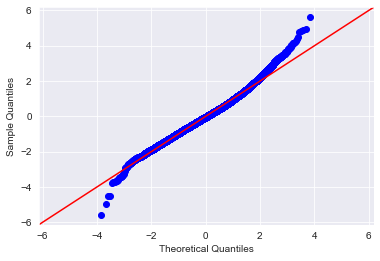

In [230]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


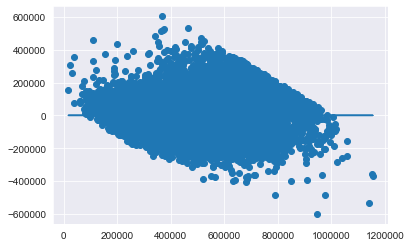

In [231]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [232]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [233]:
residuals = model.resid

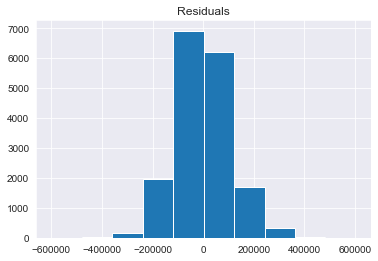

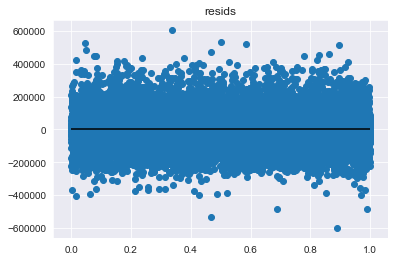

In [234]:
plot_residuals(residuals)

In [235]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [236]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [237]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6897889106907014, 0.6886316813164768, 0.6892378851842694)

In [238]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-83376.58348511593, -83342.56176885564, -83235.24363114392)

In [239]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [243]:
make_ols_sklearn(X, y)

train R2 score = 0.6909028570188772
test R2 score = 0.7009193782557409
cv5 R2 score = 0.6897889106907014
cv10 R2 score = 0.6886316813164768
cv5 MSE score = -11619656782.945164
cv10  MSE score = -11615284864.492836


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [241]:
residuals = model.resid

In [151]:
resid = pd.DataFrame(df['price'])

In [152]:
resid['residuals']  = residuals

In [153]:
resid

,price,residuals
0,538000.0,30085.507588
1,180000.0,-39395.260712
2,604000.0,145926.484321
3,510000.0,17750.950177
5,257500.0,-8787.713025
...,...,...
19216,475000.0,-7338.192627
19217,360000.0,-78224.261904
19218,400000.0,-146781.359647
19219,402101.0,-96603.814696


In [154]:
import seaborn as sns

In [155]:
X_shuff, y_shuff = shuffle(X, y)

In [156]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6911700339164041

In [157]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.690926186206584

In [158]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6911520460950016

In [159]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:24:26   Log-Likelihood:            -2.2538e+05
No. Observations:               17330   AIC:                         4.508e+05
Df Residuals:                   17317   BIC:                         4.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.172e+04 

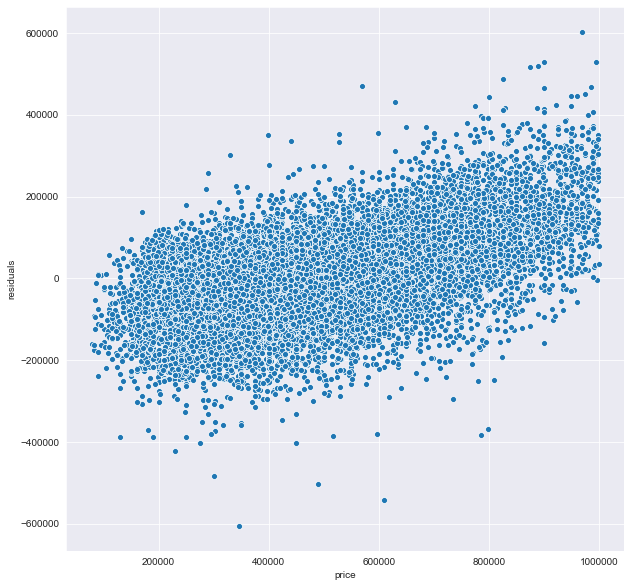

In [160]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)